## 7130 Data Analytics Assignment
* Qin Guo (s5256389)
* Chien Yi Wu (s5229308)

### Table of Contents
* [Part 1 – Data Preparation and Preprocessing](#Part1)
    * [1.1 Describe the dataset](#Part1_1)
        * [1.1.1 Describe the dataset (e.g.: type of column, value range).](#Part1_1_1)
        * [1.1.2 How many records are there in the dataset?](#Part1_1_2)
        * [1.1.3 Which period does it cover? How many different dates have job postings?](#Part1_1_3)
        * [1.1.4 How many locations does the dataset have? Which location has the most job
postings?](#Part1_1_4)
        * [1.1.5 How many job sectors(job classifications) are there in the dataset? List the name of
each sector and its’ total of job postings. ](#Part1_1_5)
        * [1.1.6 Choose your favorite job sector (e.g. Information & Communication Technology),
how many sub-sectors are there in that sector? List the name of each sub-sector and
its’ job posting number.](#Part1_1_6)
        * [1.1.7 List the salary ranges and their total of job postings](#Part1_1_7)
        * [1.1.8 List the job types. In each job type, what are the lowest salary and highest salary?](#Part1_1_8)
    * [1.2 Normalize and clean data](#Part1_2)
        * [1.2.1 The salaries are kept in the dataset as “HighestSalary” and “LowestSalary”. You should calculate the “AverageSalary” for each job.](#Part1_2_1)
        * [1.2.2 The raw dataset values of the "Id" column had inconsistencies in their representation. The Id values should have 8 number long integers only. Write code to remove unnecessary characters.](#Part1_2_2)
        * [1.2.3 The "Date" column is represented in a format that contained both date and time information. However, the time is not correct and should be removed. ](#Part1_2_3)
        * [1.2.4 Change type of “Id” column to numeric and change type of “Date” column to DateTime. ](#Part1_2_4)
        * [1.2.5 Are there any duplicate data in the dataset? Provide the way you find them and your solution to fix it. **](#Part1_2_5)
        * [1.2.6 Check missing data and visualize them in a corresponding chart.**](#Part1_2_6)
                        
* [Part 2 – Data Understanding](#part2)
    * [2.1 Get the salary ranges using “AverageSalary”, the total jobs of each range and display
them in the bar chart.](#part2_1)
    * [2.2 Display the list of job types and the number of jobs of each type using pie chart.](#part2_2)
    * [2.3 Display the list of job sectors and the number of jobs of each type using horizontal bar chart.](#part2_3)
    * [2.4 Choose your favorite location. Visualize the market share of that location in pie chart.](#part2_4)
    * [2.5 Can you find the salary distribution for the top 30 cities for the number of job postings? Visualize them in the boxplot chart.](#part2_5)
    
* [Part 3 – Data Analysis and Visualisation](#part3)
    * [3.1 Analyse by comparison.](#part3_1)  
        * [3.1.1 Which city has more job? How many jobs each type (casual, fulltime, etc.) are there in each city?](#part3_1_1)
        * [3.1.2 In each city, which are top 5 job sectors? How many jobs are there in each sector?](#part3_1_2)
        * [3.1.3 Visualise the top 5 job sectors in pie chart for each city.*](#part3_1_3)
        * [3.1.4 In each city, list the job salary range with the corresponding number of jobs. Which
city is more well-paid?](#part3_1_4)
        * [3.1.5 List top 5 companies in each city? Which sectors do they belong to?](#part3_1_5)
        * [3.1.6 Between 2 cities, which do you think it is better for employees. Explain your choice.*](#part3_1_6) 
    * [3.2 Analyse by time.](#part3_2)
        * [3.2.1 Visualise the number of job posts by month](#part3_2_1)
        * [3.2.2 Visualise the number of job posts by day of week.](#part3_2_2)
        * [3.2.3 Visualise the number of job posts by day of the month.](#part3_2_3)
        * [3.2.4 Visualise trending of the job postings for the big cities.*](#part3_2_4)
        * [3.2.5 Based on the above charts, provide your observation about the number of job posts over time. Give your own conclusion.](#part3_2_5)     
    * [3.3 Forecasting and skill extractions](#part3_3)
        * [3.3.1 Using moving average for 7 days and 30 days to predict the number of job postings and visualise them in line chart. Which one creates a better prediction? Explain your choice.**](#part3_3_1)
        * [3.3.2 Choose your favourite job sector/sub-sector, then use TF/IDF to extract important keywords. Visualise them in word cloud chart (hint: you can use the online tool https://wordart.com/create or similar websites)**.](#part3_3_2)
     
* [Part 4 – Discussion. ](#part4)
    * [4.1 Scenario 1](#part4_1)
        * [4.1.1 Scenario Data Exploration](#part4_1_1)
        * [4.1.2 Discussion and Recommendation](#part4_1_2)
    * [4.2 Scenario 2](#part4_2)
        * [4.2.1 Scenario Data Exploration](#part4_2_1)
        * [4.2.2 Discussion and Recommendation](#part4_2_2)

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib import cm
import seaborn as sns
from collections import Counter
from IPython.display import display, HTML
import re

#set seaborn style
sns.set()
sns.set_style("whitegrid")

# Increase the width of the notebook for displaying DataFrames
display(HTML("""
<style>
.container { width:75% !important; }
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
"""))

## Part 1 – Data Preparation and Preprocessing<a class="anchor" id="Part1"></a>

### 1.1 Describe the dataset <a class="anchor" id="Part1_1"></a>

#### 1.1.1 Describe the dataset (e.g.: type of column, value range). <a class="anchor" id="Part1_1_1"></a>

In [3]:
%%capture --no-display --no-stdout
df = pd.read_csv('data.csv')
print("The Dataset consists of: ", df.shape[0], " rows and ", df.shape[1], " columuns")
df.head(5)

The Dataset consists of:  318477  rows and  13  columuns


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [4]:
#type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 318477 non-null  object
 1   Title              318477 non-null  object
 2   Company            306473 non-null  object
 3   Date               318477 non-null  object
 4   Location           197229 non-null  object
 5   Area               122658 non-null  object
 6   Classification     197229 non-null  object
 7   SubClassification  197229 non-null  object
 8   Requirement        318470 non-null  object
 9   FullDescription    302302 non-null  object
 10  LowestSalary       318477 non-null  int64 
 11  HighestSalary      318477 non-null  int64 
 12  JobType            302379 non-null  object
dtypes: int64(2), object(11)
memory usage: 31.6+ MB


In [5]:
# Salary Range
df[["LowestSalary", "HighestSalary"]].describe()

,LowestSalary,HighestSalary
count,318477.000000,318477.000000
mean,65.813544,114.432342
std,51.063125,177.594941
min,0.000000,30.000000
25%,30.000000,40.000000
50%,60.000000,70.000000
75%,100.000000,120.000000
max,200.000000,999.000000


#### 1.1.2 How many records are there in the dataset? <a class="anchor" id="Part1_1_2"></a>

In [6]:
print("The Dataset have ", len(df), " records")# no null record

The Dataset have  318477  records


#### 1.1.3 Which period does it cover? How many different dates have job postings? <a class="anchor" id="Part1_1_3"></a>


In [7]:
min_date=df['Date'].min()
max_date=df['Date'].max()
print('The data cover period from {0} to {1}'.format(min_date,max_date))

The data cover period from 2018-10-01T00:00:00.000Z to 2019-03-13T00:00:00.000Z


In [8]:
print('There are {0} different dates have job postings'.format(df['Date'].nunique()))

There are 163 different dates have job postings


#### 1.1.4 How many locations does the dataset have? Which location has the most job postings? <a class="anchor" id="Part1_1_4"></a>

In [9]:
#df['Location'].unique()
#nan shouldn't been calculated
Locs=df['Location'].nunique()
print('The dataset has',Locs,'locations')

The dataset has 65 locations


In [10]:
# get the location having the most job postings
loc_most_job=df['Location'].value_counts(ascending=False).head(1) 

print('The location {} has the most job postings: {}'.format(
    loc_most_job.index[0],
    loc_most_job.values[0]))
      

The location Sydney has the most job postings: 60765


#### 1.1.5 How many job sectors(job classifications) are there in the dataset? List the name of each sector and its’ total of job postings. <a class="anchor" id="Part1_1_5"></a>

In [11]:
cls=df['Classification'].nunique()
print('The dataset has',cls,'job sectors')

The dataset has 30 job sectors


In [12]:
df_cls_jobs=df['Classification'].value_counts(ascending=False)
pd_sectors=pd.DataFrame({'sectors':df_cls_jobs.index, 'job postings':df_cls_jobs.values})
pd_sectors

,sectors,job postings
0,Information & Communication Technology,22796
1,Trades & Services,17976
2,Healthcare & Medical,17085
3,Hospitality & Tourism,15523
4,"Manufacturing, Transport & Logistics",12376
5,Administration & Office Support,10020
6,Accounting,9368
7,Education & Training,9280
8,Construction,8372
9,Sales,8119


#### 1.1.6 Choose your favorite job sector (e.g. Information & Communication Technology), how many sub-sectors are there in that sector? List the name of each sub-sector and its’ job posting number. <a class="anchor" id="Part1_1_6"></a>

In [13]:
# get dataset of sector IT
print('My favarite job sector is Information & Communication Technology.')
df_it=df[df['Classification']=='Information & Communication Technology']

print('The total sub-sectors are:',df_it['SubClassification'].nunique())

df_subcls_jobs=df_it['SubClassification'].value_counts(ascending=False)
pd_subsectors=pd.DataFrame({'IT sub-sectors':df_subcls_jobs.index, 'job postings':df_subcls_jobs.values})
pd_subsectors

My favarite job sector is Information & Communication Technology.
The total sub-sectors are: 22


,IT sub-sectors,job postings
0,Developers/Programmers,4211
1,Business/Systems Analysts,2986
2,Programme & Project Management,2413
3,Architects,1548
4,Engineering - Software,1437
5,Help Desk & IT Support,1374
6,Networks & Systems Administration,1194
7,Consultants,1149
8,Other,997
9,Testing & Quality Assurance,831


#### 1.1.7 List the salary ranges and their total of job postings <a class="anchor" id="Part1_1_7"></a>

In [14]:
df1=df.copy()
df1['Job_postings']=1
df1['SalaryRange']=df1['LowestSalary'].astype(str) +'-'+ df1['HighestSalary'].astype(str)
df_salary_ranges=df1.groupby(['SalaryRange'],sort=True).agg({'Job_postings': 'sum'}).reset_index().sort_values(['Job_postings'], ascending=False)

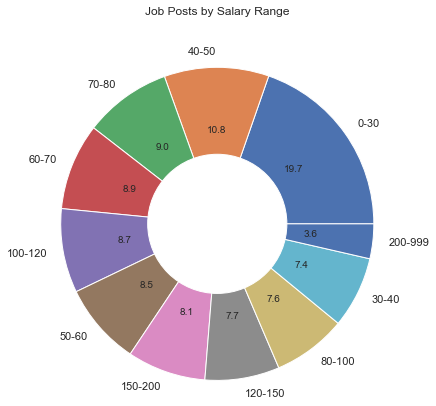

In [15]:
#job postings per job type plot

# Pie Chart
plt.pie(df_salary_ranges['Job_postings'], labels=df_salary_ranges['SalaryRange'],autopct='%.1f'
,radius=1.8)

# Adding Title of chart
plt.title("Job Posts by Salary Range",fontsize=12, pad=100)

# draw circle
centre_circle = plt.Circle((0, 0), 0.8, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

<h4>Salary Ranges</h4>
    <ul>
        <li>There are 11 different Salary Ranges.</li>
        <li>The lowest Salary Range from 0-30K has the largest share with almost 20%.</li>
        <li>The highest Salary Range from 200-999K has the lowest share with only 3.6%.</li>
        <li>The remaining Salary Ranges have a fairly equal share of the market with ~7-10% each</li>
</ul>

#### 1.1.8 List the job types. In each job type, what are the lowest salary and highest salary? <a class="anchor" id="Part1_1_8"></a>

In [16]:
df.groupby(['JobType']).agg({'LowestSalary': 'min','HighestSalary':'max'}).reset_index()

,JobType,LowestSalary,HighestSalary
0,Casual/Vacation,0,999
1,Contract/Temp,0,999
2,Full Time,0,999
3,Part Time,0,999


### 1.2 Normalize and clean data <a class="anchor" id="Part1_2"></a>

#### 1.2.1 The salaries are kept in the dataset as “HighestSalary” and “LowestSalary”.
#### You should calculate the “AverageSalary” for each job.
<a class="anchor" id="Part1_2_1"></a>

In [17]:
df = df.assign(AverageSalary = df[['LowestSalary', 'HighestSalary']].mean(axis=1).astype(int))
df.head(5)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15


#### 1.2.2 The raw dataset values of the "Id" column had inconsistencies in their representation.
#### The Id values should have 8 number long integers only.
#### Write code to remove unnecessary characters.
<a class="anchor" id="Part1_2_2"></a>

In [18]:
#Get Id with other characters or Id values is not 8 bnumber long integers
df[df['Id'].str.isnumeric()==False].head(5)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
153767,37915260&searchrequesttoken=e859cc74-e22f-498d...,Shift Supervisor / Delivery Driver / Juniors,PIZZA HUT SOUTH MACKAY,2018-12-11T00:00:00.000Z,Mackay & Coalfields,NaN,Retail & Consumer Products,Management - Store,Shift Supervisor / Delivery Drivers / Juniors,NaN,0,30,NaN,15
153768,37915238&searchrequesttoken=e859cc74-e22f-498d...,Sales Support Administrator,Registry Australia,2018-12-11T00:00:00.000Z,Perth,"CBD, Inner & Western Suburbs",Administration & Office Support,Client & Sales Administration,Great opportunity to work at one of Australia'...,NaN,0,30,NaN,15
153769,37915306&searchrequesttoken=e859cc74-e22f-498d...,Part time Café All-rounder in Docklands,Jora Local,2018-12-11T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe/retail shop in Docklands is seeking a p...,NaN,0,30,NaN,15
153770,37915157&searchrequesttoken=e859cc74-e22f-498d...,Retail Assistant,Aldi Stores,2018-12-11T00:00:00.000Z,Ballarat & Central Highlands,NaN,Retail & Consumer Products,Retail Assistants,Whether they’re racing to fill shelves or scan...,NaN,0,30,NaN,15
153771,37915257&searchrequesttoken=e859cc74-e22f-498d...,Part time Waiter/Waitress in Mooroopna,Jora Local,2018-12-11T00:00:00.000Z,Shepparton & Goulburn Valley,NaN,Hospitality & Tourism,Waiting Staff,A restaurant in Mooroopna is seeking a part ti...,NaN,0,30,NaN,15


In [19]:
# remove unnecessary characters
# import re
# df['Id']=df['Id'].apply(lambda x: re.split("&", str(x)),1).str[0]
df['Id']=df['Id'].apply(lambda x: str(x).rsplit("&")[0])

In [20]:
#Judge if length of Id with other characters or Id values is not 8 number long integers are zero
len(df[df['Id'].str.isnumeric()==False])+len(df[df['Id'].str.len() != 8])

0

#### 1.2.3 The "Date" column is represented in a format that contained both date and time information. However, the time is not correct and should be removed.
<a class="anchor" id="Part1_2_3"></a>

In [21]:
#TODO: fix the data type of column Date, remove time 
df["Date"] = df["Date"].replace({r'T.*':''}, regex=True) 
df['Date']

0         2018-10-07
1         2018-10-07
2         2018-10-07
3         2018-10-07
4         2018-10-07
             ...    
318472    2019-03-13
318473    2019-03-13
318474    2019-03-12
318475    2019-03-08
318476    2019-03-13
Name: Date, Length: 318477, dtype: object

#### 1.2.4 Change type of “Id” column to numeric and change type of “Date” column to DateTime.<a class="anchor" id="Part1_2_4"></a>

In [22]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtype

dtype('<M8[ns]')

In [23]:
df["Date"] = pd.to_datetime(df["Date"])
df['Id']=df['Id'].astype('int')
df.dtypes

Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary                 int64
dtype: object

#### 1.2.5 Are there any duplicate data in the dataset? Provide the way you find
#### them and your solution to fix it.  <a class="anchor" id="Part1_2_5"></a>

In [24]:
# many records are the same but with different ID
duplicate_count = df[df.duplicated()].shape[0]
print("Duplicates found: ", duplicate_count)
no_dates = df.drop('Date', axis=1)
duplicate_count_no_dates = no_dates[no_dates.duplicated()].shape[0]
difference = duplicate_count_no_dates - duplicate_count
print('Additional duplicates found without regard to timestamp: ', difference)

Duplicates found:  108
Additional duplicates found without regard to timestamp:  43


In [25]:
df.drop_duplicates(inplace = True)
duplicate_count = df[df.duplicated()].shape[0]
print("After droping duplicates,Duplicates found: ", duplicate_count)

After droping duplicates,Duplicates found:  0


#### Employers may post same job more than once on the same day, which means there exists duplicates if we delete the ID. In this case, we decicde to ignore this issue.

#### 1.2.6 Check missing data and visualize them in a corresponding chart.** <a class="anchor" id="Part1_2_6"></a>

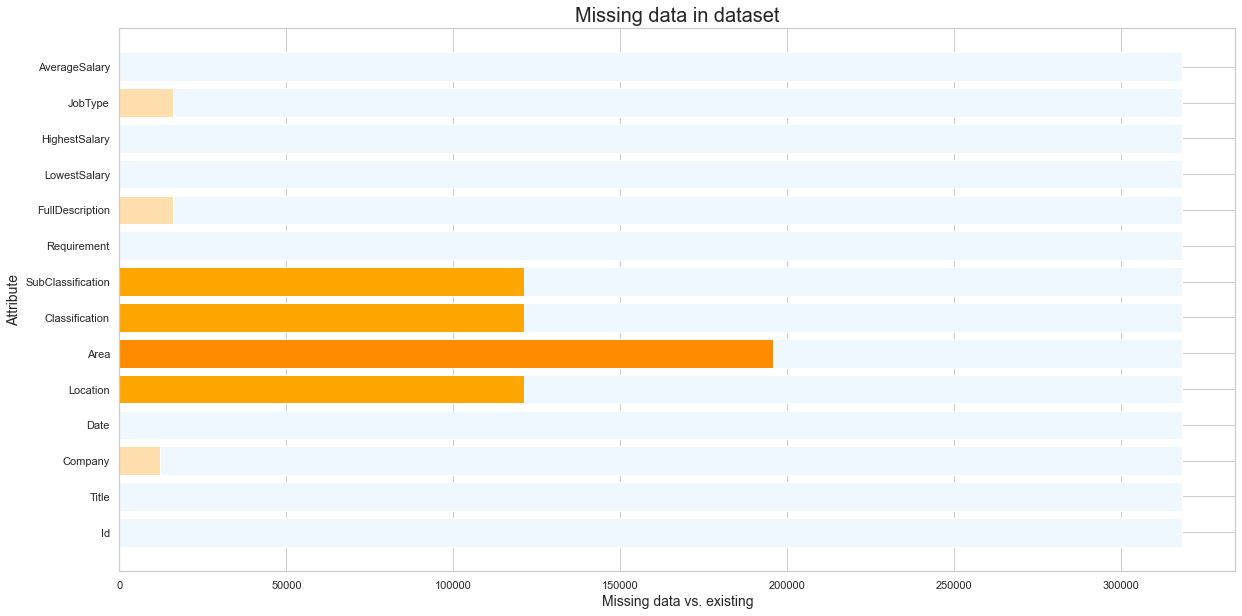

In [26]:
def colorize_bar(value, max_value):
    low, high = max_value * 0.2, max_value * 0.66
    if(value <= low):
        return 'navajowhite'
    elif(value >= high):
        return 'darkorange'
    else:
        return 'orange'

    
nulls = df.isnull().sum()
cols = [colorize_bar(n, nulls.max()) for n in nulls]

total_data = [df.shape[0]] * df.shape[1]

plt.figure(figsize=(20,10))
plt.barh(df.columns.values,total_data, color='aliceblue')
plt.barh(df.columns.values,nulls, color=cols)

plt.ylabel('Attribute', size=14)
plt.xlabel('Missing data vs. existing', size=14)
plt.title('Missing data in dataset', size=20)

plt.show();

In [27]:
#Save the cleaned and preprocessed dataset
#df.to_csv("preprocessed_data.csv")

## Part 2 – Data Understanding  <a class="anchor" id="part2"></a>


###  2.1 Get the salary ranges using “AverageSalary”, the total jobs of each range and display them in the bar chart. <a class="anchor" id="part2_1"></a>

In [28]:
#Group by average salary and count the numbers
averageSalaryDf = df.groupby('AverageSalary').count()
averageSalaryDf['AverageSalary'] = (averageSalaryDf.index*1000).astype(float).map('{:,.0f}'.format)
averageSalaryDf['Count'] = averageSalaryDf["Id"]
averageSalaryDf

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Count
AverageSalary,,,,,,,,,,,,,,,
15,62586,62586,59564,62586,38488,24364,38488,38488,62584,56043,62586,62586,56058,"15,000",62586
35,23471,23471,22292,23471,16391,9809,16391,16391,23471,22091,23471,23471,22093,"35,000",23471
45,34431,34431,32071,34431,21731,13259,21731,21731,34430,33575,34431,34431,33580,"45,000",34431
55,27018,27018,25670,27018,16552,10746,16552,16552,27017,26197,27018,27018,26213,"55,000",27018
65,28495,28495,27286,28495,18117,11390,18117,18117,28495,27542,28495,28495,27564,"65,000",28495
75,28706,28706,27788,28706,17047,10451,17047,17047,28706,27664,28706,28706,27668,"75,000",28706
90,24249,24249,23625,24249,12701,7562,12701,12701,24248,23587,24249,24249,23590,"90,000",24249
110,27669,27669,27146,27669,17133,10571,17133,17133,27667,26678,27669,27669,26679,"110,000",27669
135,24506,24506,24157,24506,14693,9476,14693,14693,24506,23602,24506,24506,23604,"135,000",24506


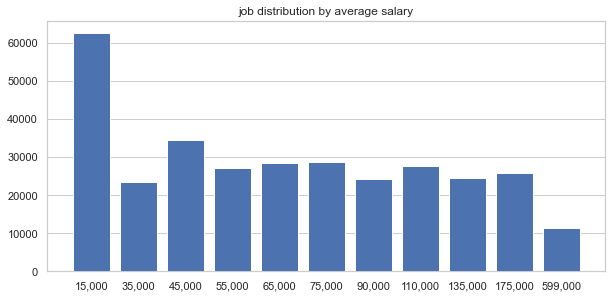

In [29]:
# f, ax = plt.subplots(figsize=(10, 6))
# df.groupby(['AverageSalary']).size().plot(kind='bar')
# f.autofmt_xdate(bottom=0.3,rotation=0,ha='center')
# plt.title("job distribution by average salary")
# plt.show()

f, ax = plt.subplots(figsize=(10, 6))
ax.yaxis.grid(zorder=0)
ax.xaxis.grid()
f.autofmt_xdate(bottom=0.3,rotation=0,ha='center')
ax.bar(averageSalaryDf['AverageSalary'],averageSalaryDf['Count'],zorder=3)
plt.title("job distribution by average salary")
plt.show()

### 2.2 Display the list of job types and the number of jobs of each type using pie chart.<a class="anchor" id="part2_2"></a>

In [30]:
df_JobType_Postings=df.groupby(['JobType']).size().reset_index(name='JobPostings')
df_JobType_Postings

,JobType,JobPostings
0,Casual/Vacation,25353
1,Contract/Temp,53897
2,Full Time,201172
3,Part Time,21889


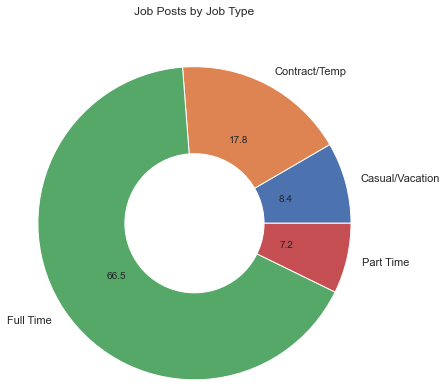

In [31]:
#job postings per job type plot

# Pie Chart
plt.pie(df_JobType_Postings['JobPostings'], labels=df_JobType_Postings['JobType'],autopct='%.1f'
,radius=1.8)

# Adding Title of chart
plt.title("Job Posts by Job Type",fontsize=12, pad=100)

# draw circle
centre_circle = plt.Circle((0, 0), 0.8, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

 <h3>Observation</h3>
<ul>
        <li>The 4 different job types are <b>Full Time, Contract/Temporary, Part Time and Casual.</b></li>
        <li>More than 66% of Jobs are Full Time Positions, followed by almost 18% for Contract and Temporary positions and an almost equal remaining amount of jobs in Part Time or Casual positions.</li>
        <li>We will look at the distribution of job types in more detail specific to locations and classifications in subsequent sections of the analysis.</li>
</ul>


### 2.3 Display the list of job sectors and the number of jobs of each type using horizontal bar chart.<a class="anchor" id="part2_3"></a>

Text(0.5, 0, 'Number of Postings')

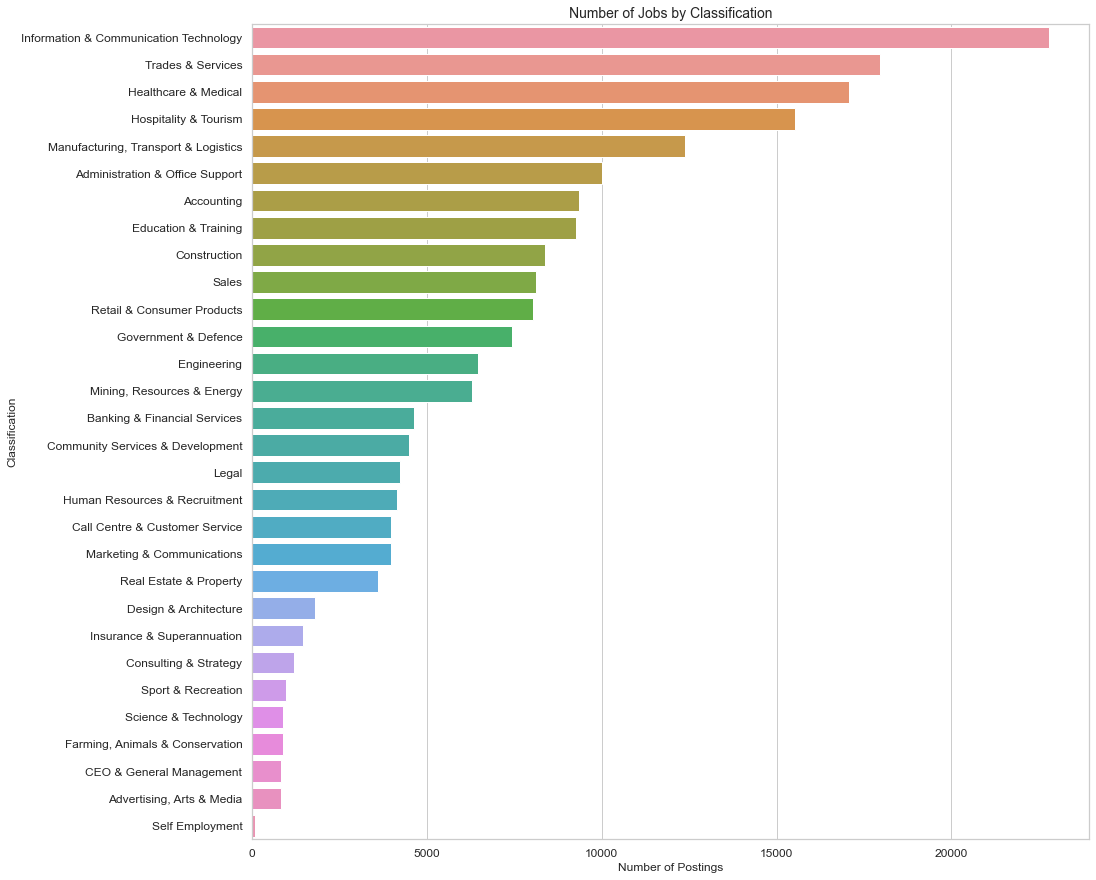

In [32]:
plt.figure(figsize=(15,15))
ax=sns.countplot(y=df['Classification'],data=df,order=df['Classification'].value_counts().index)
ax.tick_params(labelsize=12) #axes x,y size by default
plt.title('Number of Jobs by Classification',fontsize=14)
plt.ylabel("Classification")
plt.xlabel("Number of Postings")  

<h3>Observation</h3>

<ul>
    <li>There are 30 different classifications</li>
    <li>The top 5 classifications with most job postings are <b>Information & Communication Technology, Trades & Services, Healthcare & Medical, Hospitality & Tourism and Manufacturing, Transport & Logistics</b></li>
        <li>Among the classifications with the lowest share of the market are <b>Self Employment, Advertising Arts & Marketing, CEO & General Manegement and Farming, Animals & Conservation</b></li>
</ul>

### 2.4 Choose your favorite location. Visualize the market share of that location in pie chart.<a class="anchor" id="part2_4"></a>

In [33]:
#the full dataframe
df_favorite=df[df['Location']=="ACT"].groupby(['Classification']).size().reset_index(name="Job Postings").sort_values(by='Job Postings', ascending=False)
df_favorite['Job Postings']=round(df_favorite['Job Postings']/df_favorite['Job Postings'].sum()*100,2)

In [34]:
#the top 18
df_favorite2 = df_favorite[:18].copy()

#others
new_row = pd.DataFrame(data = {
    'Classification' : ['others'],
    'Job Postings' : [df_favorite['Job Postings'][18:].sum()]
})
                    
#combining top 15 with others
df_favorite2 = pd.concat([df_favorite2, new_row])
df_favorite2

,Classification,Job Postings
17,Information & Communication Technology,32.92
13,Government & Defence,9.70
14,Healthcare & Medical,6.00
29,Trades & Services,5.87
15,Hospitality & Tourism,5.22
1,Administration & Office Support,5.10
10,Education & Training,4.61
24,Retail & Consumer Products,4.08
7,Construction,3.39
0,Accounting,2.88


In [35]:
# from matplotlib.pyplot import cm
# color=cm.rainbow(np.linspace(0,1,len(df_favorite2)))
colors = ['#1F77B4', '#AEC7E8', '#FF7F0E', '#FFBB78', '#2CA02C', '#98DF8A', '#B5CF6B', '#FF9896','#9467BD', '#C5B0D5', '#BCBD22']

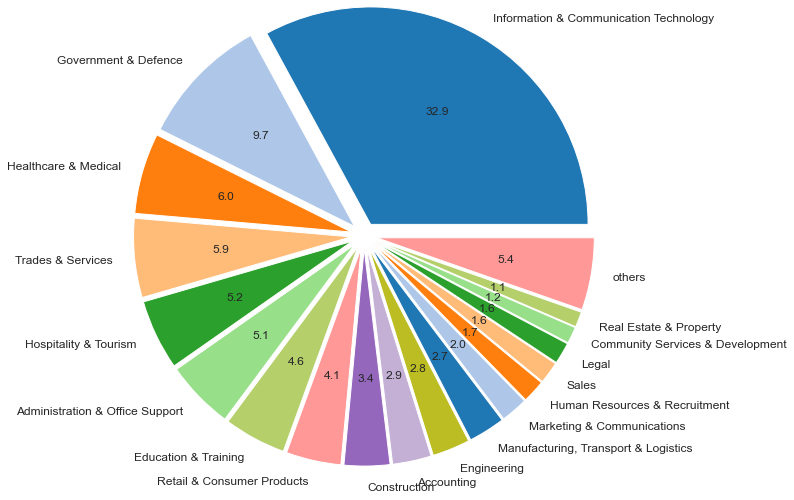

In [36]:
#job postings per job type plot
explode=np.full(len(df_favorite2), 0.15)  

# Pie Chart
plt.pie(df_favorite2['Job Postings'], 
        labels=df_favorite2['Classification'],
        autopct='%.1f',
        radius=2.5,
        colors=colors,
        explode=explode,
        startangle=0,
       counterclock=True,
       textprops={'fontsize': 12}
       )

# draw circle
centre_circle = plt.Circle((0, 0), 0.1, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

### 2.5 Can you find the salary distribution for the top 30 cities for the number of job postings? Visualize them in the boxplot chart.<a class="anchor" id="part2_5"></a>

In [37]:
df_top_cities=df.groupby(['Location']).size().sort_values(ascending=False).head(30).reset_index(name="Job Postings")
df_top_cities

,Location,Job Postings
0,Sydney,60729
1,Melbourne,46656
2,Brisbane,21455
3,Perth,13192
4,Adelaide,6650
5,ACT,6249
6,"Newcastle, Maitland & Hunter",3953
7,Gold Coast,3587
8,South West Coast VIC,1789
9,Mackay & Coalfields,1701


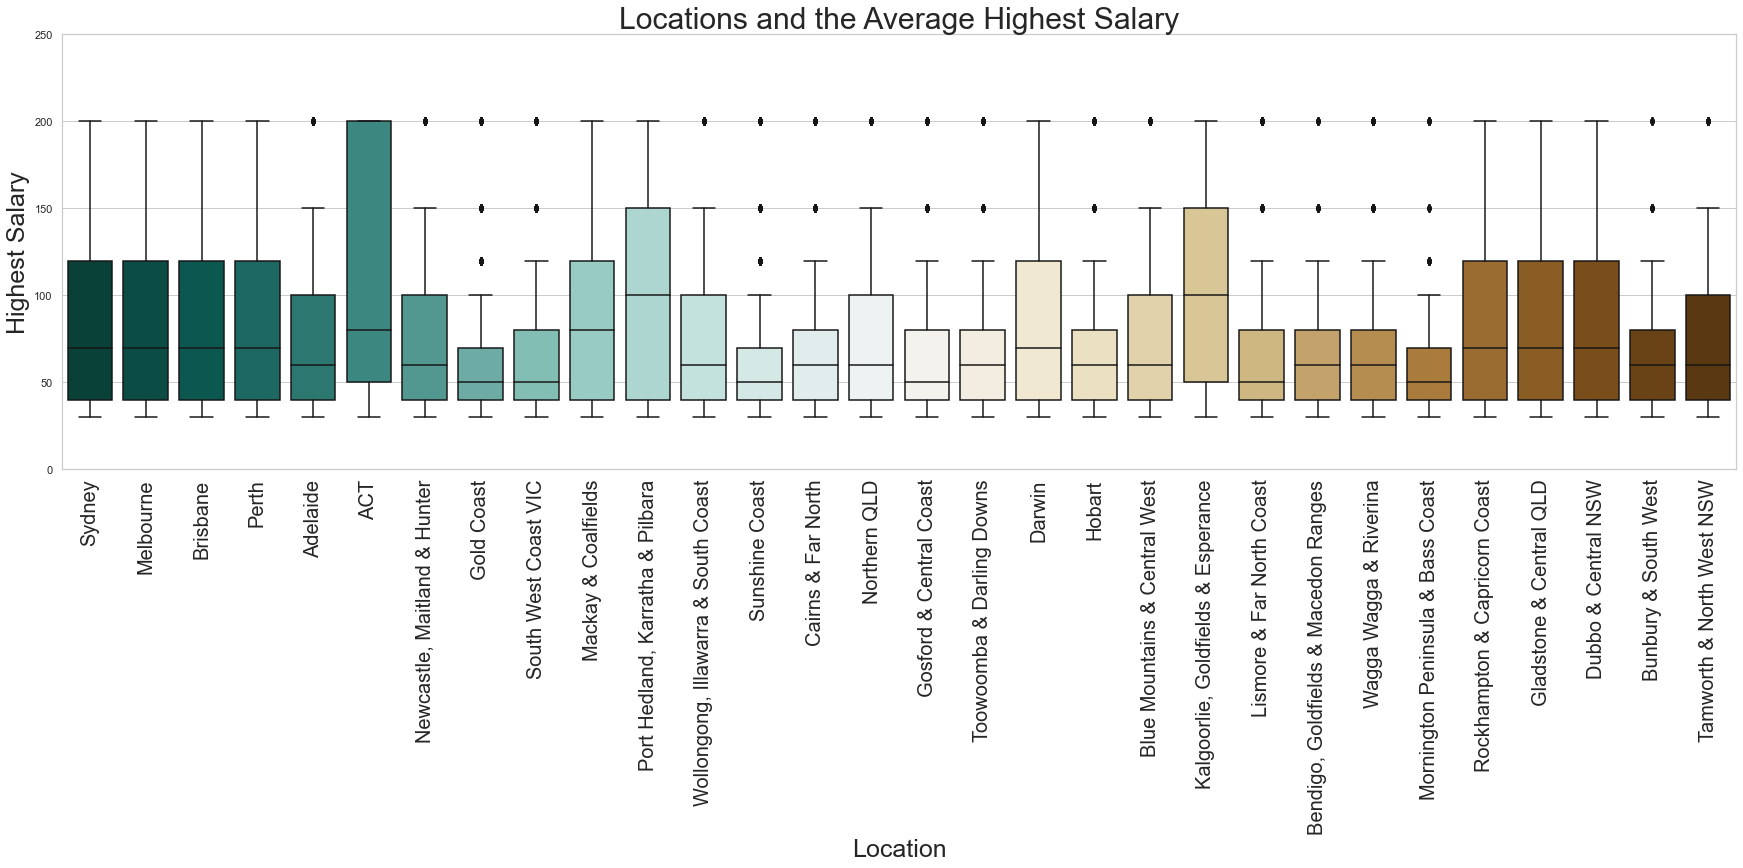

In [38]:
#get a list of locations ordered by Highest Salary (Average) descending
df_location = df[df['Location'].isna()==False]
df_top_30 = df_location.groupby(['Location']).count().reset_index().sort_values(by=['Title'],ascending=False)[:30]['Location'].tolist()
df_salary_locations_high = df[df['Location'].isin(df_top_30)]

plt.figure(figsize=(30,8))

box_plt_high = sns.boxplot(x='Location',y='HighestSalary',data=df_salary_locations_high, order=df_top_30,palette='BrBG_r')
box_plt_high.set_xticklabels(box_plt_high.get_xticklabels(),rotation=90,fontsize=20)
plt.title('Locations and the Average Highest Salary',size=30)
plt.ylabel('Highest Salary',fontsize=25)
plt.xlabel('Location',fontsize=25)

plt.ylim([0,250])
plt.show()

<h3>Observation</h3>
The Box and Whisker plot above gives a better view on the distribution of salaries by depicting  the five-number summary of the dataset, which includes the minimum, first quartile, median, third quartile, and maximum.
<ul>
    <li>Sydney, Melbourne Brisbane and Perth, which are also the top 4 cities for number of jobs postings, have an equal distribution of salaries.</li>
    <li>Adelaide is the only city out of the top 5 where the salary seems to be a little bit lower.</li>
    <li>The salary distribution for ACT is higher than for other locations with the third quartile being equal to the maximum.</li>
    <li>Port Hedland, Karratha & Pilbara and Kalgoorlie, Goldfields and Esperance show higher salaries compared to most other lcocations.
    <li>Gold Coast, Sunshine Coast and Cairns are amongst the places with the lowest salaries.</li>
</ul>

## Part 3 – Data Analysis and Visualisation <a class="anchor" id="part3"></a>

### 3.1 Analyse by comparison <a class="anchor" id="part3_1"></a>

The following will explore the differences between Brisbane and Gold Coast in the job market 

#### 3.1.1 Which city has more job? How many jobs each type (casual, fulltime, etc.) are there in each city?
<a class="anchor" id="part3_1_1"></a>

In [39]:
df_brisbane = df[df['Location']=='Brisbane']
df_gold_cost = df[df['Location']=='Gold Coast']

In [40]:
print("Brisbane has", df_brisbane.shape[0], "jobs and Gold Coast has",df_gold_cost.shape[0],"jobs.")
if df_brisbane.shape[0]> df_gold_cost.shape[0]:
    print("Brisbane has more jobs.")
elif  df_brisbane.shape[0] < df_gold_cost.shape[0]:
    print("Gold Coast has more jobs.")
else:
    print("Brisbane and Gold Coast has the same jobs.")

Brisbane has 21455 jobs and Gold Coast has 3587 jobs.
Brisbane has more jobs.


In [41]:
df_brisbane.groupby(['JobType']).size()

JobType
Casual/Vacation     1886
Contract/Temp       4115
Full Time          12997
Part Time           1216
dtype: int64

In [42]:
df_gold_cost.groupby(['JobType']).size()

JobType
Casual/Vacation     621
Contract/Temp       389
Full Time          2068
Part Time           308
dtype: int64

<h4>Observation</h4>
<ul>
    <li>Gold Coast has more Casual/Vacation jobs than contract/Temp jobs </li>
     <li>Brisbane has more jobs than Gold Coast </li>
</ul>

#### 3.1.2 In each city, which are top 5 job sectors? How many jobs are there in each sector?
<a class="anchor" id="part3_1_2"></a>

In [43]:
df_brisbane_cls_jobs_series=df_brisbane['Classification'].value_counts(ascending=False)
df_brisbane_cls_jobs=pd.DataFrame({'Brisbane Sectors':df_brisbane_cls_jobs_series.index, 
                                   'Job Postings':df_brisbane_cls_jobs_series.values})
print("The top 5 job sectors and jobs postings in Brisbane as below")
df_brisbane_cls_jobs.head()


The top 5 job sectors and jobs postings in Brisbane as below


,Brisbane Sectors,Job Postings
0,Information & Communication Technology,2766
1,Trades & Services,1992
2,Healthcare & Medical,1823
3,"Manufacturing, Transport & Logistics",1667
4,Hospitality & Tourism,1334


In [44]:
df_gold_cost_cls_jobs_series=df_gold_cost['Classification'].value_counts(ascending=False)
df_gold_cost_cls_jobs=pd.DataFrame({'Gold Coast Sectors':df_gold_cost_cls_jobs_series.index, 
                                   'Job Postings':df_gold_cost_cls_jobs_series.values})
print("The top 5 job sectors and jobs postings in Gold Cost as below")
df_gold_cost_cls_jobs.head()


The top 5 job sectors and jobs postings in Gold Cost as below


,Gold Coast Sectors,Job Postings
0,Hospitality & Tourism,609
1,Healthcare & Medical,481
2,Trades & Services,468
3,"Manufacturing, Transport & Logistics",214
4,Retail & Consumer Products,206


<h4>Observation</h4>
<ul>
    <li> The top 5 sectors in Brisbane with most job postings are <b>Information & Communication Technology, Trades & Services, Healthcare & Medical, Manufacturing, Transport & Logistics and Hospitality & Tourism </b> </li>
     <li>The top 5 sectors in Brisbane with most job postings are <b>Hospitality & Tourism , Healthcare & Medical , Trades & Services ,	Manufacturing, Transport & Logistics and Retail & Consumer Products	</b></li>
</ul>

#### 3.1.3 Visualise the top 5 job sectors in pie chart for each city
<a class="anchor" id="part3_1_3"></a>

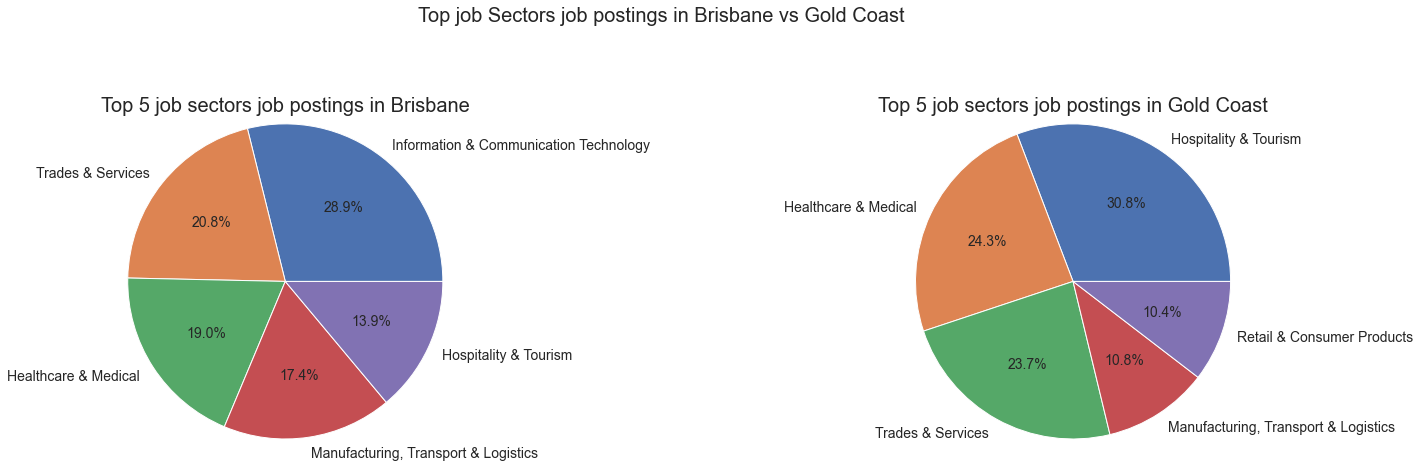

In [45]:
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 3)
fig.suptitle('Top job Sectors job postings in Brisbane vs Gold Coast',fontsize=20)

ax1.pie(df_brisbane_cls_jobs.head()['Job Postings'], 
        labels=df_brisbane_cls_jobs.head()['Brisbane Sectors'],
         autopct='%.1f%%',textprops={'fontsize': 14},
        radius=1.2) 
ax1.set_title('Top 5 job sectors job postings in Brisbane',fontsize=20)

ax2.pie(df_gold_cost_cls_jobs.head()['Job Postings'], 
        labels=df_gold_cost_cls_jobs.head()['Gold Coast Sectors'],
         autopct='%.1f%%',textprops={'fontsize': 14},
        radius=1.2)
ax2.set_title('Top 5 job sectors job postings in Gold Coast',fontsize=20)

plt.show()

<h4>Observation</h4>
<ul>
    <li>Brisbane has more oppotunities in Information & Communicaiton Technology </li>
    <li>Gold Coast has more opportunites in Hospitality & Tourism </li>
</ul>

#### 3.1.4 In each city, list the job salary range with the corresponding number of jobs. Which
#### city is more well-paid? <a class="anchor" id="part3_1_4"></a>

In [46]:
df_brisbane=df_brisbane.copy()
df_brisbane['Job_postings']=1
df_brisbane['SalaryRange']=df_brisbane['LowestSalary'].astype(str) +'-'+ df_brisbane['HighestSalary'].astype(str)
df_brisbane_salary_ranges = df_brisbane.groupby(['SalaryRange'],sort=True).agg({'Job_postings': 'sum'}).reset_index().sort_values(['Job_postings'], ascending=False)
df_brisbane_salary_ranges


,SalaryRange,Job_postings
0,0-30,4077
6,40-50,2734
8,60-70,2032
1,100-120,1934
7,50-60,1933
9,70-80,1799
3,150-200,1612
5,30-40,1565
2,120-150,1462
10,80-100,1327


In [47]:
df_gold_cost=df_gold_cost.copy()
df_gold_cost['Job_postings']=1
df_gold_cost['SalaryRange']=df_gold_cost['LowestSalary'].astype(str) +'-'+ df_gold_cost['HighestSalary'].astype(str)
df_gold_coast_salary_ranges=df_gold_cost.groupby(['SalaryRange'],sort=True).agg({'Job_postings': 'sum'}).reset_index().sort_values(['Job_postings'], ascending=False)
df_gold_coast_salary_ranges

,SalaryRange,Job_postings
6,40-50,755
0,0-30,703
5,30-40,477
7,50-60,408
8,60-70,375
9,70-80,269
1,100-120,178
10,80-100,140
3,150-200,108
2,120-150,98


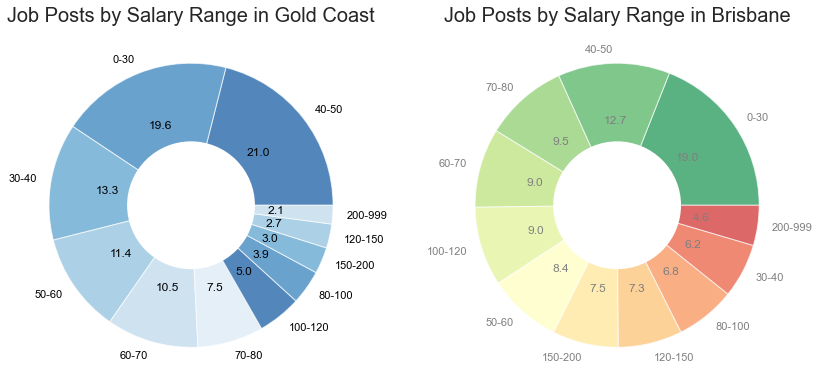

In [48]:
#create layout
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(14,14))

#Brisbane salary ranges plot
p, texts, autotexts = ax1.pie(df_brisbane_salary_ranges['Job_postings'], colors=sns.color_palette("RdYlGn_r", len(df_brisbane_salary_ranges)),labels=df_salary_ranges['SalaryRange'],wedgeprops={'alpha':0.7},autopct='%1.1f')
ax1.title.set_text('Job Posts by Salary Range in Brisbane')
ax1.title.set_size(20)

# add centre circle to make it a donut
centre_circle = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=0)
ax1.add_patch(centre_circle)

for t in texts:
    t.set_color('gray')
for t in autotexts:
    t.set_color('gray')
    t.set_size(12)
    
#Gold Coast salary ranges plot   
p2, texts2, autotexts2 = ax2.pie(df_gold_coast_salary_ranges['Job_postings'], colors=sns.color_palette("Blues_r"),labels=df_gold_coast_salary_ranges['SalaryRange'],wedgeprops={'alpha':0.7},autopct='%1.1f')
ax2.title.set_text('Job Posts by Salary Range in Gold Coast')
ax2.title.set_size(20)

# add centre circle to make it a donut
centre_circle2 = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=0)
ax2.add_patch(centre_circle2)

for t in texts2:
    t.set_color('black')
for t in autotexts2:
    t.set_color('black')
    t.set_size(12)
    
plt.show()

<h4>Observation</h4>
<ul>
    <li>The Salary Range from <b>70-80k,80-100k,100-120k,120-150k,150-200k,200-999k</b> has more job postings percentage in Brisbane </li>
    <li>The Salary Range from <b>0-30k,30-40k,40-50k,50-60k</b> has more job postings percentage in Gold Coast </li>
</ul>

<h4>Conclusion</h4>
<ul>
    <li>Obviously, Brisbane is more well paid</li>
</ul>

#### 3.1.5 List top 5 companies in each city? Which sectors do they belong to?
<a class="anchor" id="part3_1_5"></a>

In [49]:
df_brisbane_company=df_brisbane['Company'].value_counts(ascending=False).head()
top_5_cities=df_brisbane_company.index
print("The top 5 compannies in Brisbane is:")
for i in range(0, len(top_5_cities)):
     print(top_5_cities[i])

The top 5 compannies in Brisbane is:
Jora Local
Hudson
u&u. Recruitment Partners
The University of Queensland
Programmed Skilled Workforce


In [50]:
df_brisbane = df[df['Location']=='Brisbane']

In [51]:
df_brisbane_company_sector=df_brisbane[df_brisbane['Company'].isin(top_5_cities)][['Company','Classification']]
df_brisbane_company_sector.drop_duplicates(inplace = True)
df_brisbane_company_sector.sort_values('Company')

,Company,Classification
15923,Hudson,Marketing & Communications
65321,Hudson,Consulting & Strategy
187700,Hudson,Construction
41450,Hudson,Government & Defence
37644,Hudson,Human Resources & Recruitment
...,...,...
40661,u&u. Recruitment Partners,Consulting & Strategy
41297,u&u. Recruitment Partners,Banking & Financial Services
50366,u&u. Recruitment Partners,Administration & Office Support
17682,u&u. Recruitment Partners,Construction


In [52]:
df_brisbane_company_sector.groupby('Company').count().reset_index().sort_values(['Classification'], ascending=False) 

,Company,Classification
4,u&u. Recruitment Partners,20
0,Hudson,18
3,The University of Queensland,16
2,Programmed Skilled Workforce,10
1,Jora Local,3


<h4>Observation</h4>
<ul>
    <li><b>u&u. Recruitment Partners</b> belongs to <b>20</b> sectors</li>
     <li><b>Hudson</b> belongs to <b>18</b> sectors</li>
     <li><b>The University of Queensland</b> belongs to <b>16</b> sectors</li>
     <li><b>Programmed Skilled Workforce</b> belongs to <b>10</b> sectores</li>
    <li>Company <b>Jora Local</b> belongs to <b>3</b> sectors: <b>Hospitality & Tourism,Retail & Consumer Products,Trades & Services </b></li>
</ul>

#### 3.1.6 Between 2 cities, which do you think it is better for employees. Explain your choice.*
<a class="anchor" id="part3_1_6"></a>

<h4>Conclusion</h4>
<ul>
     <li>According to the above, We can compare the two cities by job type, salary range,sectors and company</li>
    <li>If you would like to find a Casual/Vacation job in Hospitality & Tourism, Gold Coast is a good choice</li>
    <li>Brisbane is better for employees who pursuit higer salary</li>
    <li>If you would like to find a job in IT company, Brisbane is a good choice</li>
    <li>Overall, Brisbane has more job postings than Gold Coast. Employees has more oppotunites and 
    chanlleges</li>
</ul>

### 3.2 Analyse by time <a class="anchor" id="part3_2"></a>

In [53]:
# for following analysing, creating a new dataframe df_date by adding column year,month,week and day 
df_date=df.copy()
#assign month,week to each rows
df_date['Year']=df_date['Date'].dt.strftime('%y')
df_date['Month']=df_date['Date'].dt.strftime('%b')
df_date['Week']=df_date['Date'].dt.strftime("%a")
df_date['Day']=df_date['Date'].dt.strftime("%-d").astype('int') #df_date[df_date['Day']=='31']
df_date=df_date.drop(['Date'],axis=1)

#### 3.2.1 Visualise the number of job posts by month
<a class="anchor" id="part3_2_1"></a>

In [54]:
tmp=df_date.groupby(['Year','Month'],sort=False).size()
df_month_job_posting = pd.DataFrame(tmp, columns=['Job_Postings']).reset_index()
df_month_job_posting 

,Year,Month,Job_Postings
0,18,Oct,113782
1,18,Nov,40985
2,18,Dec,71521
3,19,Jan,69676
4,19,Feb,22003
5,19,Mar,402


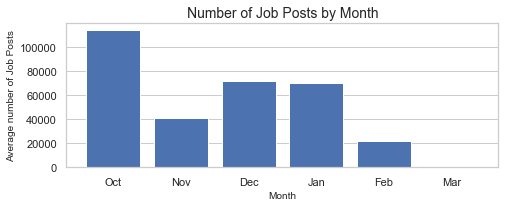

In [55]:
fig = plt.figure(figsize=(6, 2))

ax = fig.add_axes([0,0,1,1])
ax.yaxis.grid(zorder=0)
ax.xaxis.grid()
ax.bar(df_month_job_posting['Month'], df_month_job_posting['Job_Postings'],zorder=1)
ax.set_title("Number of Job Posts by Month",fontsize = 14)
ax.set_xlabel('Month',fontsize = 10)
ax.set_ylabel('Average number of Job Posts',fontsize = 10)

plt.show()

#### 3.2.2 Visualise the number of job posts by day of week.
<a class="anchor" id="part3_2_2"></a>

In [56]:
tmp=df_date.groupby(['Week'],sort=False).size()
df_week_job_posting = pd.DataFrame(tmp, columns=['Job_Postings']).reset_index()
df_week_job_posting=df_week_job_posting.set_index('Week')
sort_list=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
df_week_job_posting=df_week_job_posting.loc[sort_list]
df_week_job_posting

,Job_Postings
Week,
Mon,51948
Tue,57885
Wed,66500
Thu,59173
Fri,61813
Sat,8489
Sun,12561


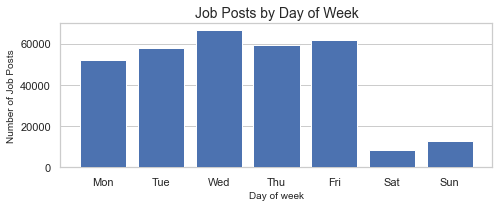

In [57]:
fig = plt.figure(figsize=(6, 2))

ax = fig.add_axes([0,0,1,1])
ax.yaxis.grid(zorder=0)
ax.xaxis.grid()
ax.bar(df_week_job_posting.index, df_week_job_posting ['Job_Postings'],zorder=3)
ax.set_title("Job Posts by Day of Week",fontsize = 14)
ax.set_xlabel('Day of week',fontsize = 10)
ax.set_ylabel('Number of Job Posts',fontsize = 10)

plt.show()

#### 3.2.3 Visualise the number of job posts by day of the month.
<a class="anchor" id="part3_2_3"></a>

In [58]:
tmp=df_date.groupby(['Day','Month'],sort=False).size().reset_index().sort_values(by='Day')
tmp.columns = ['Day', 'Month', 'Job_Postings']
#The number of job posts by day of the month
tmp

,Day,Month,Job_Postings
74,1,Dec,71
88,1,Jan,1790
6,1,Oct,1023
37,1,Nov,1316
121,1,Feb,115
...,...,...,...
90,30,Dec,824
75,30,Nov,551
29,31,Oct,8641
125,31,Jan,74


In [59]:
df_day_job_posting=tmp.groupby(['Day'],sort=False).mean().astype(int).reset_index()
df_day_job_posting

,Day,Job_Postings
0,1,729
1,2,1935
2,3,2035
3,4,2787
4,5,2504
5,6,1163
6,7,1884
7,8,1546
8,9,2637
9,10,3356


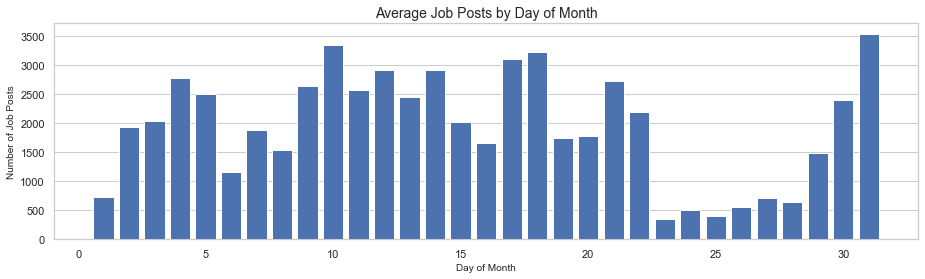

In [60]:
fig = plt.figure(figsize=(12,3))

ax = fig.add_axes([0,0,1,1])
ax.yaxis.grid(zorder=0)
ax.xaxis.grid()
ax.bar(df_day_job_posting['Day'], df_day_job_posting['Job_Postings'],zorder=3)
ax.set_title("Average Job Posts by Day of Month",fontsize = 14)
ax.set_xlabel('Day of Month',fontsize = 10)
ax.set_ylabel('Number of Job Posts',fontsize = 10)

plt.show()

<h3>Observation</h3>

Looking at the plots above, that show the number of job posts with respect to Day of the Month (average), Day of the Week, day of the Month and finally by Week of the month (average), there are a few noteworthy observations that we can make:

- Jobs are 28% more likely to be posted on a Wednesday, than they are on a Monday.
- Jobs are twice as likely to be posted in the second week of each month, than they are in the last week.
- Despite the final week of the month being the most bare for job postings, the postings rapidly spike for dates of the 29th, 30th and 31st. So much so, that the 31st has the highest average of postings across the month. This could be in relation to job posting KPI's that recruiters and recruitment agencies may have.
 
Additionally, through visible observation we have found the following insights
<ul>
    <li>The lowest number of jobs are posted between the 23rd and 28th of every month </li>
    <li>The vast majority of jobs are posted on weekdays, with only a few jobs being posted on weekend days.</li>
    <li>The jobs posted in the month of October dwarfs the remaining months included in the analysis.</li>
    <li>Little to no meaningful data can be extracted in the scope of March as the dataset does not cover the full month.</li>
</ul>

#### 3.2.4 Visualise trending of the job postings for the big cities
<a class="anchor" id="part3_2_4"></a>

In [61]:
#Get top 5 cities's dataset
top_5_cities = ['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide']
df_top_5_cities = df[df['Location'].isin(top_5_cities)]
#df_top_5_cities=df_top_5_cities.drop(['Date'],axis=1)

In [62]:
# get job posts of location and date
df_date_job_posting_by_5_city = df_top_5_cities.groupby(['Location', 'Date'],sort=False).size().reset_index()
df_date_job_posting_by_5_city.columns = ['Top 5 Cities', 'Date', 'Number of Job Posts']
df_date_job_posting_by_5_city

,Top 5 Cities,Date,Number of Job Posts
0,Sydney,2018-10-07,344
1,Brisbane,2018-10-07,105
2,Adelaide,2018-10-07,38
3,Melbourne,2018-10-07,246
4,Perth,2018-10-07,55
...,...,...,...
361,Brisbane,2018-11-29,45
362,Adelaide,2018-11-29,14
363,Melbourne,2018-11-29,97
364,Sydney,2018-11-29,130


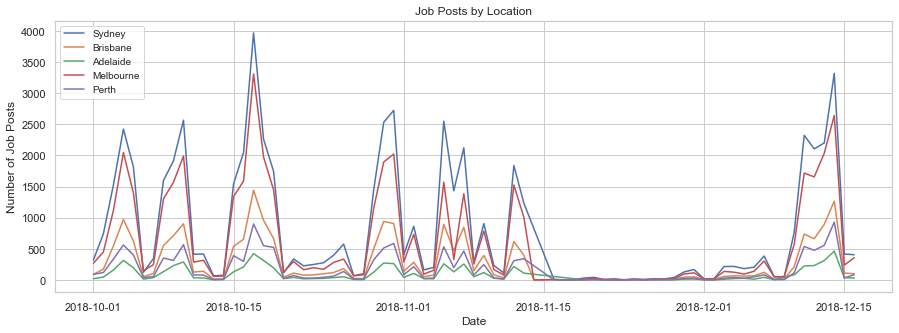

In [63]:
sns.set(rc = {'figure.figsize':(15,5)})
sns.set_style("whitegrid")

p=sns.lineplot(data=df_date_job_posting_by_5_city
             , x="Date"
             , y="Number of Job Posts"
             , hue="Top 5 Cities").set(title='Job Posts by Location')

plt.legend(fontsize = 10)

#### 3.2.5 Based on the above charts, 
#### provide your observation about the number of job posts over time. Give your own conclusion.
<a class="anchor" id="part3_2_5"></a>

<h3>Observation</h3>

The time series above shows the number of job posts by location over time. As the values for location were missing from any job posts starting from the 16th of December 2018, the time series only covers a date range from the 1st of October 2018 - 15th December 2018. 

<ul>
    <li>There are a lot of irregular fluctuations and there does not seem to be an ovious pattern of posting.</li>
    <li>The highest spikes are in mid October and mid December</li>
    <li>There is a period with a very low amount of job postings from mid November to the start of December.</li>
</ul>

### 3.3 Forecasting and skill extractions <a class="anchor" id="part3_3"></a>

#### 3.3.1 Using moving average for 7 days and 30 days to predict the number of job postings and visualise them in line chart. 
#### Which one creates a better prediction? Explain your choice.**
<a class="anchor" id="part3_3_1"></a>

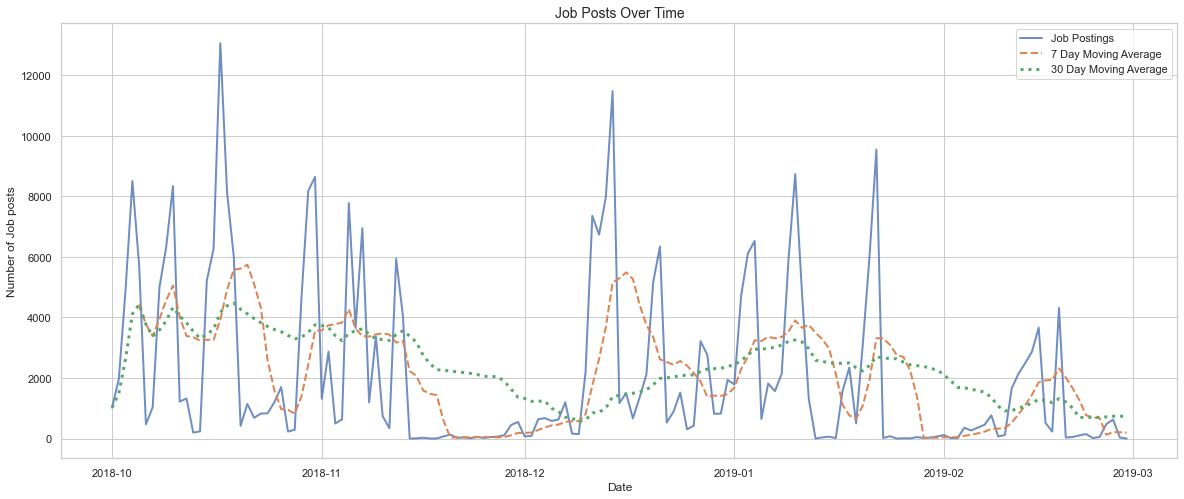

In [64]:
#get dataframe with dates as index
df_timeseries_total = df.groupby(['Date']).count().reset_index().sort_values(by=['Date'])
df_timeseries_total.set_index('Date',inplace=True)

#exclude March because the dataset stops halfway through the month
df_timeseries_total = df_timeseries_total[:151]

# Get the count of jobs over time
df_timeseries_total = df_timeseries_total['Title'].rename('Count')

# Generate moving average over a weekly interval
moving_average_week = df_timeseries_total.rolling(7, min_periods=5)
moving_average_month = df_timeseries_total.rolling(30, min_periods=0)
plot_df = pd.DataFrame({'Count': df_timeseries_total, '7 Day Moving Average': moving_average_week.mean(), '30 Day Moving Average': moving_average_month.mean()})

plt.figure(figsize=(20,8))
plt.plot(plot_df['Count'],alpha=0.8, lw=2)
plt.plot(plot_df['7 Day Moving Average'],linestyle='--', lw=2)
plt.plot(plot_df['30 Day Moving Average'],linestyle='dotted', lw=3)
plt.legend(['Job Postings', '7 Day Moving Average', '30 Day Moving Average'], frameon=True)
plt.title('Job Posts Over Time',size=14)
plt.xlabel('Date')
plt.ylabel('Number of Job posts')
plt.show()

<h3>Observation</h3>

The time series above shows the number of job posts over time, including a moving average by week and month. However, trying to extract seasonality and predicting future trends did not prove to be useful, as the dataset ends mid-march and the number of job posts decreases towards the end of the dataset. This means that future predictions look are trending towards no job posts at all, which is unlikely to actually happen.

<ul>
    <li>There are a lot of irregular fluctuations and there does not seem to be an ovious pattern of posting.</li>
    <li>The highest spikes are in mid October and mid December</li>
    <li>There is a period with a very low amount of job postings from mid November to the start of December.</li>
</ul>

In [65]:
grouped_by_classification = df.groupby('Classification')
job_count_by_industry = pd.DataFrame(grouped_by_classification.size().reset_index(name = "Jobs")).sort_values(by=['Jobs'], ascending=False)


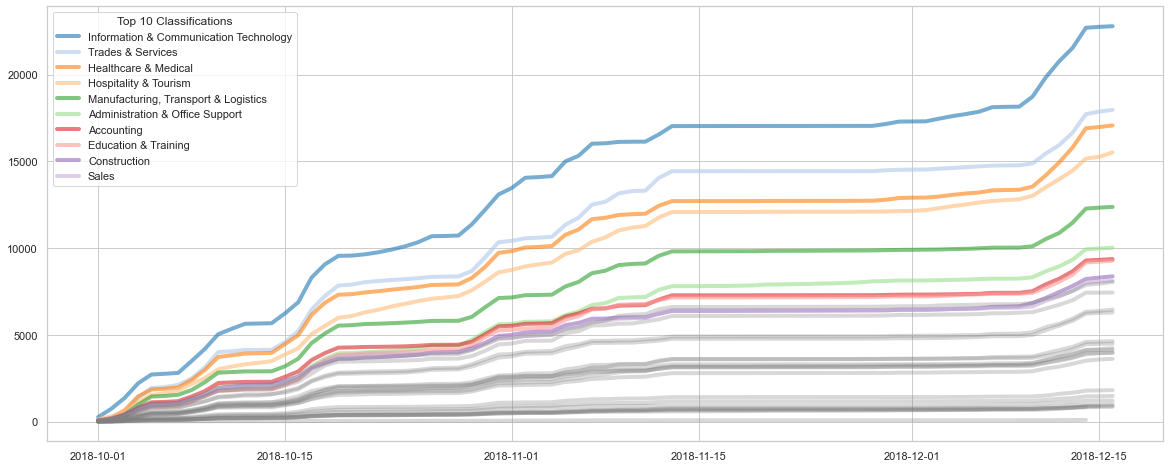

In [66]:
df_new = df[df['Classification'].isna()==False].groupby(['Date', 'Classification'])['Title'].count().reset_index()
df_running = df_new.groupby(['Classification','Date'])['Title'].sum().groupby(level=0).cumsum().reset_index()

df_running.columns = ['Classification', 'Date', 'RunningTotal']
df_running.set_index('Date', inplace=True)

top_10 = job_count_by_industry['Classification'][:10]
classifications = job_count_by_industry['Classification'][10:]
plt.figure(figsize=(20,8))
clrs = sns.color_palette("tab20", 10)
for i,c in enumerate(top_10):
    plt.plot(df_running[df_running['Classification']==c]['RunningTotal'], lw=4, color=clrs[i], alpha=0.6)
    
for i,cl in enumerate(classifications):
    plt.plot(df_running[df_running['Classification']==cl]['RunningTotal'], lw=4, color='grey', alpha=0.3)

plt.legend(job_count_by_industry['Classification'][:10], title='Top 10 Classifications', frameon=True)

plt.show()

### Observation

As we view the accumulating job posting per classification from October through to December, it's clear that generally speaking, each industry is growing and stagnating throughout the same periods of time. This being said, the rate at which the leading industries progress further ahead of their counterparts is apparent when viewing ICT, Trades & Services, Healthcare & Medical and Hospitality & Tourism

<h2>Timing Summary</h2>
<br>
<p>Overall and as expected, the larger cities like Sydney, Melbourne, Brisbane, Perth and Adelaide have the most number of job postings in Australia, however, depending on the job sector, some remote/rural locations like Port Hedland, Mackay and Kalgoorlie are popular locations with competitive salaries.</p>
<p>Job postings are most commonly created on Wednesdays, followed by Fridays. Job postings spike sharply in the final few days of the month. The second week of each month has the strongest average job posting count.</p>

#### 3.3.2 Choose your favourite job sector/sub-sector, then use TF/IDF to extract important keywords.
#### Visualise them in word cloud chart (hint: you can use the online tool 
#### https://wordart.com/create or similar websites)**
<a class="anchor" id="part3_3_2"></a>

In [67]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from nltk.corpus import stopwords
import wordcloud

classifications = df['Classification'].dropna().unique()

custom_stopwords = ['store','join', 'looking', 'want', 'site', 'month', 'week', 'level', 'required', 'one', 'end', 'nsw',
                    'positions', 'make', 'across', 'take', 'key', 'large', 'based', 'melbourne', 'staff', 'australia',
                    'position', 'currently', 'full', 'projects', 'north', 'basis', 'next', '12', 'per', 'term', 'program',
                    'home', 'long' 'person', 'agency', 'apply', 'day', 'roles', 'within' 'perth', 'sydney',  'residential',
                    'years', '2019', 'market', 'data', 'exists', 'immediate', 'available', 'officer', 'needed', 'school',
                    'south', 'small', 'cbd', 'year', 'months', 'early', 'life', 'largest', '30', 'part', 'well', 'busy', 'cafe', 'restaurant']

stop_words = stopwords.words('english')
for word in custom_stopwords:
    stop_words.append(word)

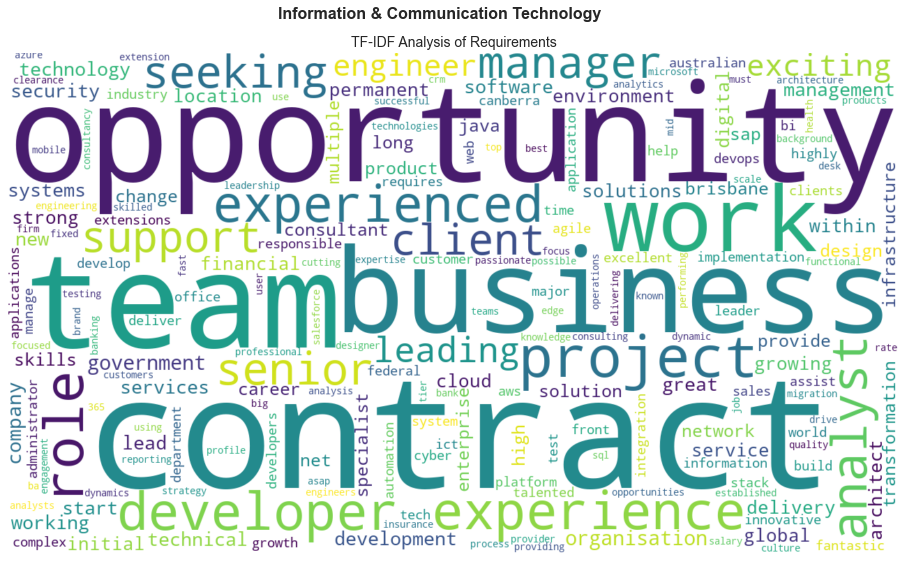

<function __main__.update(Classification='Information & Communication Technology')>

In [68]:
def update(Classification="Information & Communication Technology"):
    requirements = df[df['Classification']==Classification]['Requirement'].dropna()
    original_documents = [x.strip() for x in requirements] 

    tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = stop_words, max_features=200)

    features = tfidf.fit(original_documents)
    corpus_tf_idf = tfidf.transform(original_documents) 

    sum_words = corpus_tf_idf.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
    words_freq_dict = {x: y for x,y in words_freq}
    words_freq_dict.items()
    #print(sorted(words_freq, key = lambda x: x[1], reverse=True)[:5])

    word_cloud = wordcloud.WordCloud(width=1280,height=720,background_color='white',colormap='viridis')
    word_cloud.generate_from_frequencies(words_freq_dict)

    
    plt.figure(figsize=(16,16))
    plt.suptitle(t="Information & Communication Technology", size=16, weight='bold', x=0.5,y=0.76)
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis("off")
    plt.title('TF-IDF Analysis of Requirements', size=14)
    plt.show()
     
interact(update, Classification=classifications)


<h3>Observation</h3>

<ul>
    <li>Team work and experience are highly valued in all job sectors.</li>
    <li>Much of the job postings textual real estate is dominated by words that directly reference the industry itself.</li>
    <li>Common use of the "time", possibly inflated due to reference to non-skill related terms such as [part time, full time etc.]</li>
    <li>Common use of the "senior", possible contributions from senior positions themselves, and the interaction a non-senior position would require with seniors</li>

</ul>

## Part 4 – Discussion  <a class="anchor" id="part4"></a>

### 4.1 Scenario 1 <a class="anchor" id="part4_1"></a>

<b>Tom, a grade 12 student in Brisbane, has good results in all of the
subjects in his school. He is finding a major in the University which can guarantee a
job in his state (Queensland) with a good income (>=80K) in the future. Based on the
current job market dataset, which major and the related subjects do you recommend
him? Explain your choice.*** ( Max 750 words)</b>

To explore the possible major recommendation, one external file is imported (AUS_state.csv) to show all cities located in Queensland state.
<a href='https://www.kaggle.com/datasets/koki25ando/city-list-of-australia'>https://www.kaggle.com/datasets/koki25ando/city-list-of-australia</a> <br>
The exploration includes following steps:
1. Identify all cities in queensland
2. Find all jobs in those cities with at least 80k salary.
3. Look up the top 5 job sectors in those jobs
4. Dive into subclasses of the top 5 job sectors

#### 4.1.1 Scenario Data Exploration
<a class="anchor" id="part4_1_1"></a>

In [69]:
df['Location'].unique()

array(['Sydney', 'Richmond & Hawkesbury', 'Brisbane',
       'Gosford & Central Coast', 'Adelaide', 'Melbourne', 'Perth',
       'Mackay & Coalfields', 'Sunshine Coast', 'Gold Coast',
       'West Gippsland & Latrobe Valley', 'Hervey Bay & Fraser Coast',
       'South West Coast VIC', 'Mornington Peninsula & Bass Coast',
       'Port Hedland, Karratha & Pilbara', 'Ballarat & Central Highlands',
       'Bendigo, Goldfields & Macedon Ranges',
       'Yarra Valley & High Country', 'Coffs Harbour & North Coast',
       'Newcastle, Maitland & Hunter', 'Tumut, Snowy & Monaro', 'Darwin',
       'Toowoomba & Darling Downs', 'ACT',
       'Wollongong, Illawarra & South Coast',
       'Port Macquarie & Mid North Coast',
       'Southern Highlands & Tablelands', 'Albury Area',
       'Yorke Peninsula & Clare Valley',
       'Kalgoorlie, Goldfields & Esperance',
       'Far West & North Central NSW', 'Cairns & Far North',
       'Wagga Wagga & Riverina', 'Lismore & Far North Coast',
       'Alice 

In [70]:
df_AUS_states = pd.read_csv('AUS_state.csv')
df_AUS_states.head()

,Rank,GCCSA/SUA,State/Territory,June 2017[2],2011 Census[3]\nPopulation,Growth,Percentage of\nnational population (June 2017)
0,1,Sydney,New South Wales,"5,131,326","4,391,674",16.84%,20.86%
1,2,Melbourne,Victoria,"4,850,740","3,999,982",21.27%,19.72%
2,3,Brisbane,Queensland,"2,408,223","2,065,996",16.56%,9.79%
3,4,Perth,Western Australia,"2,043,138","1,728,867",18.18%,8.31%
4,5,Adelaide,South Australia,"1,333,927","1,262,940",5.62%,5.42%


In [71]:
df_cities_in_Queensland = df_AUS_states[df_AUS_states['State/Territory']=='Queensland']
df_cities_in_Queensland.head()

,Rank,GCCSA/SUA,State/Territory,June 2017[2],2011 Census[3]\nPopulation,Growth,Percentage of\nnational population (June 2017)
2,3,Brisbane,Queensland,"2,408,223","2,065,996",16.56%,9.79%
8,9,Sunshine Coast,Queensland,"325,399","270,770",20.18%,1.32%
12,13,Townsville,Queensland,"180,346","162,292",11.12%,0.73%
13,14,Cairns,Queensland,"151,925","133,911",13.45%,0.62%
15,16,Toowoomba,Queensland,"135,631","105,984",27.97%,0.55%


In [72]:
df_cities_in_Queensland['GCCSA/SUA'].unique()

array(['Brisbane', 'Sunshine Coast', 'Townsville', 'Cairns', 'Toowoomba',
       'Mackay', 'Rockhampton', 'Bundaberg', 'Hervey Bay',
       'Gladstone–Tannum Sands', 'Maryborough', 'Gympie', 'Yeppoon',
       'Mount Isa', 'Warwick', 'Emerald', 'Kingaroy'], dtype=object)

In [73]:
df_job_in_queensland = df[df['Location'].isin(df_cities_in_Queensland['GCCSA/SUA'].unique())]
df_job_in_queensland.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN,15
15,37404259,Customer Service Officer,NaN,2018-10-07,Sunshine Coast,NaN,Call Centre & Customer Service,Customer Service - Call Centre,An opportunity for a customer service-focused ...,NaN,0,30,NaN,15
21,37404239,Casual Barista in Murarrie,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Bar & Beverage Staff,A cafe in Murarrie is seeking a casual Barista...,NaN,0,30,NaN,15
26,37404396,Clinical Document Processing and Quality Assur...,West Moreton Hospital and Health Service,2018-10-07,Brisbane,Western Suburbs & Ipswich,Administration & Office Support,Records Management & Document Control,administrative and systems support in relation...,NaN,0,30,NaN,15


In [74]:
df_job_in_queensland.shape

(23009, 14)

In [75]:
df_job_in_queensland_more_80k = df_job_in_queensland[df_job_in_queensland['LowestSalary']>=80]
df_job_in_queensland_more_80k.shape

(7560, 14)

In [76]:
df_job_in_queensland_more_80k['Classification'].value_counts(ascending=False)

Information & Communication Technology    2034
Healthcare & Medical                       883
Engineering                                606
Construction                               523
Government & Defence                       487
Legal                                      344
Accounting                                 341
Mining, Resources & Energy                 329
Education & Training                       328
Sales                                      304
Manufacturing, Transport & Logistics       185
Human Resources & Recruitment              173
Trades & Services                          149
Banking & Financial Services               148
Marketing & Communications                 117
Consulting & Strategy                       87
Real Estate & Property                      75
CEO & General Management                    74
Insurance & Superannuation                  65
Administration & Office Support             59
Science & Technology                        55
Community Ser

In [77]:
top_5_sectors = df_job_in_queensland_more_80k['Classification'].value_counts(ascending=False)[:5]

In [78]:
for idx, sec in enumerate(top_5_sectors.index):
    print('----Top ',idx+1,'- Class:',sec,'----')
    df_temp = df_job_in_queensland_more_80k[df_job_in_queensland_more_80k['Classification']==sec]
    print(df_temp['SubClassification'].value_counts(ascending=False))

----Top  1 - Class: Information & Communication Technology ----
Developers/Programmers                   332
Programme & Project Management           327
Business/Systems Analysts                299
Architects                               178
Testing & Quality Assurance              116
Networks & Systems Administration        107
Other                                    101
Security                                  91
Consultants                               90
Management                                87
Engineering - Software                    78
Database Development & Administration     60
Engineering - Network                     36
Sales - Pre & Post                        25
Product Management & Development          21
Help Desk & IT Support                    19
Web Development & Production              19
Telecommunications                        17
Team Leaders                              17
Technical Writing                         10
Engineering - Hardware              

#### 4.1.2 Discussion and Recommendation
<a class="anchor" id="part4_2_1"></a>

According to the above analysis, the top 5 sectors provide the most jobs having an annual salary of at least 80K. They are No1. Information and Communication Technology, No2. Healthcare, No3. (Civil/Construction) Engineering, No4. Construction and No5. Government and Defense.

I would recommend Tom to major in Computer Science, Medicine, Civil Engineering, Architecture or something related to the above fields. If he is not interested in these fields, he can look up the required expertise in Australian Public Service. The state government also provides well-paid jobs in Queensland.

It is also a good choice for any government-required major such as ICT, medical and health, civil/construction engineering, construction management, etc.

### 4.2 Scenario 2 <a class="anchor" id="part4_2"></a>

<b>To gain a better reputation, Griffith University wants to attract more
students by enhancing the employability of the graduates. As a data analyst, you
need to give the recommendation for the management board for the changing of the
admission numbers in each major. Which majors should be extended, and which
majors should be reduced (Assume that we only need to use job market data,
regardless of other factors such as social impact, economic impact, etc. )? Justify
your recommendation.*** ( Max 750 words)</b>

#### 4.2.1 Scenario Data Exploration
<a class="anchor" id="part4_2_1"></a>

Our goal is enhancing the employability of the graduates at Griffith University. We would like to know Which majors will have more employment opportunities. We will explore columns title, classification, subclassifatcion from the 1st of October 2018 - 13th of October 2019 of seek market data in Australia.

####  We just analyse the employability of the graduates, so removing the senior postions , high salary >80K and some positions which are not suitable at Griffith University, such as chef,cook,carpenter,Labourer,Driver, Boilermaker, leader etc. Given high salaries in some department,we just exclude the LowestSalary >100K

In [119]:
df_job_postings=df[df['LowestSalary']<=100]
df_job_postings=df_job_postings.loc[df_job_postings['Title'].str.contains("Manager", case=False)==False]
df_job_postings=df_job_postings.loc[df_job_postings['Title'].str.contains("Senior", case=False)==False]
df_job_postings=df_job_postings.loc[df_job_postings['Title'].str.contains("Director", case=False)==False]
df_job_postings=df_job_postings.loc[df_job_postings['Title'].str.contains("Leader", case=False)==False]
df_job_postings=df_job_postings.loc[df_job_postings['Title'].str.contains("CEO", case=False)==False]
df_job_postings=df_job_postings.loc[df_job_postings['Title'].str.contains("CFO", case=False)==False]
df_job_postings=df_job_postings.loc[df_job_postings['Title'].str.contains("CIO", case=False)==False]
df_job_postings=df_job_postings.loc[df_job_postings['Title'].str.contains("CRO", case=False)==False]
df_job_postings=df_job_postings.loc[df_job_postings['Title'].str.contains("Chef", case=False)==False]
df_job_postings=df_job_postings.loc[df_job_postings['Title'].str.contains("Cook", case=False)==False]
df_job_postings=df_job_postings.loc[df_job_postings['Title'].str.contains("Carpenter", case=False)==False]
df_job_postings=df_job_postings.loc[df_job_postings['Title'].str.contains("Labourer", case=False)==False]
df_job_postings=df_job_postings.loc[df_job_postings['Title'].str.contains("Driver", case=False)==False]
df_job_postings=df_job_postings.loc[df_job_postings['Title'].str.contains("Boilermaker", case=False)==False]
print("The Dataset consists of: ", df_job_postings.shape[0], " rows and ", df_job_postings.shape[1], " columuns")
df_job_postings.head(5)

The Dataset consists of:  190126  rows and  14  columuns


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15


#### Let's looking at the change of  each sectors' job postings

In [139]:
df_cls_jobs1=df['Classification'].value_counts(ascending=False)
pd_sectors1=pd.DataFrame({'sectors':df_cls_jobs1.index, 'job postings':df_cls_jobs1.values})

# for graduates
df_cls_jobs2=df_job_postings['Classification'].value_counts(ascending=False)
pd_sectors2=pd.DataFrame({'sectors':df_cls_jobs2.index, 'graduate job postings':df_cls_jobs2.values})

In [142]:
pd_sectors_combine=pd_sectors1.merge(pd_sectors2, on='sectors', how='left')
pd_sectors_combine

,sectors,job postings,graduate job postings
0,Information & Communication Technology,22787,7842
1,Trades & Services,17966,14122
2,Healthcare & Medical,17068,11823
3,Hospitality & Tourism,15513,8980
4,"Manufacturing, Transport & Logistics",12372,7077
5,Administration & Office Support,10017,9141
6,Accounting,9365,5632
7,Education & Training,9272,6792
8,Construction,8369,3472
9,Sales,8112,4189


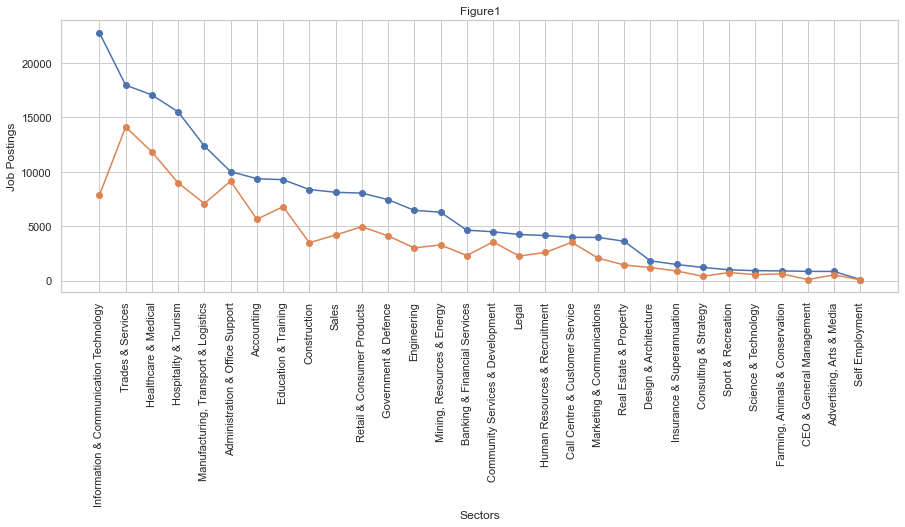

In [149]:
# create figure and axis objects with subplots()
fig,ax=plt.subplots()
ax.plot(pd_sectors_combine['sectors'],pd_sectors_combine['job postings'], marker="o")
ax.set_xlabel("Sectors")
ax.set_ylabel("Job Postings")
ax.plot(pd_sectors_combine['sectors'],pd_sectors_combine['graduate job postings'], marker="o")
plt.xticks(rotation=90)
plt.title("Figure1")
plt.show()

#### We try to find out the most popular titles and job postings.

In [90]:
print("It will take a while, please be patient....")
titles = df_job_postings['Title'].dropna().unique()
df_title = pd.DataFrame({"Title": titles})
df_title['Count'] = df_title['Title'].apply(lambda x: pd.Series(len(df_job_postings[df_job_postings['Title']==x])))
df_title = df_title.sort_values(by='Count', ascending=False)
df_title=df_title.reset_index()
df_title.drop('index', axis=1, inplace=True)
df_title.head(60)

It will take a while, please be patient....


,Title,Count
0,Administration Assistant,724
1,Executive Assistant,658
2,Receptionist,607
3,Registered Nurse,581
4,Customer Service Officer,515
5,Administration Officer,499
6,Payroll Officer,401
7,Customer Service Representative,390
8,Recruitment Consultant,389
9,Electrician,369


#### Administration & Office Support
admin_positions={'Administration Assistant','Executive Assistant','Executive Assistant'
                ,'Customer Service Officer','Administration Officer','Personal Assistant'
                ,'Office Administrator','Contract Administrator','Administrative Assistant'
                ,'Customer Service','Corporate Receptionist','Legal Secretary'}
####  Healthcare & Medical
med_positions={'Registered Nurse','Medical Receptionist','Physiotherapist','Dental Assistant'
               ,'Occupational Therapist','Disability Support Worker','Administrator'
              ,'Disability Support Workers','Support Worker'}

#### Accounting
account_positions={'Payroll Officer','Accounts Payable Officer','Assistant Accountant'
                  ,'Financial Accountant','Accountant','Accounts Receivable Officer'
                   ,'Management Accountant','Accounts Officer','Bookkeeper'}

#### Sales
sale_positions={'Customer Service Representative','Storeperson','Sales Representative',
                'Sales Consultant','Customer Service Consultant','Retail Assistant'
                ,'Marketing Coordinator'}

#### Information & Communication Technology
it_positions={'Service Technician','Business Analyst','Data Analyst'}


#### education
edu_positions={'Early Childhood Teacher','Classroom Teacher'}

#### engineering
engi_positions={'Electrician','Mechanical Fitter','Diesel Mechanic'}
  

#### Design
design_positions={'Graphic Designer'}



In [151]:
developer_jobs=df_title.loc[df_title['Title'].str.contains("Developer", case=False)]
print('The total developer jobs are ',developer_jobs['Count'].sum())
developer_jobs

The total developer jobs are  2640


,Title,Count
105,Java Developer,76
120,Software Developer,68
143,Front End Developer,60
161,Full Stack Developer,56
195,Web Developer,49
...,...,...
102611,Adobe Campaign Developer,1
102709,ReactJS Developer | Brisbane Southside,1
102776,Full Stack Developer C# Visual stuido,1
103076,Junior C++ Developer,1


#### 4.2.2 Discussion and Recommendation
<a class="anchor" id="part4_2_2"></a>


According to the above Figure1, we noticed a sharp decline in the sector Information & Communication technology from 22787 to 7842. It represents there is a shortage of high-skilled IT talents, but there is no shortage of graduates. When looking at the top 60 titles, we just found two IT positions Business Analyst:248 jobs and Service Technician:127. But the total developer jobs are  2640. It represents if graduate students in IT majoring in software development has higher oppotunities than other IT majors such as cyber security network, data analyst,business analyst, technician supporter,etc.

We also noticed that the following sectors are almost keep stable  
<li>Manufacturing, Transport & Logistics</li>
<li>Community Services & Development</li>
<li>Call Centre & Customer Service</li> 
<li>Trades & Services</li>

We also noticed thatsectors has many different job positions for graduates. That means there are enough job oppotunites in the job market If students are sufficiently competitive 
<li>Healthcare & Medical</li>
<li>Accounting</li>
<li>Sales</li>


I recommend that Griffith University should
<li>reduce the admission numbers in IT related majors excluding software development because the barriers to entry for these majors are high</li>
<li>extend software development major and related majors in sectors Manufacturing, Transport & Logistics,Community Services & Development , Call Centre & Customer Service and Trades & Services because the barriers to entry for these majors are not high</li>
<li>decide the change of admission numbers in majors related to sectors Healthcare & Medical,Accounting and sales depending on whether Griffith University is competitive in these majors</li>